In [1]:
import numpy as np
import pandas as pd

In [8]:
import json
# to load the json file and create it into a dataframe
with open(r'/content/intents_2.json') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [7]:
# To split all the patterns
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [5]:
  import nltk
  nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' and 'stopwords' resources from NLTK
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Create a lemmatizer object and define the list of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to lemmatize and remove stopwords from a sentence
def process_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Lemmatize each word that is not a stopword and join them back into a sentence
    processed_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words])
    return processed_sentence

df['pattern'] = ''
for i in range(0,len(df)):
  df['pattern'][i] = process_sentence(df['patterns'][i])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: expected string or bytes-like object, got 'list'

In [9]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK 데이터 다운로드
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

def process_sentence(sentence):
    # 입력이 리스트인 경우 문자열로 변환
    if isinstance(sentence, list):
        sentence = ' '.join(sentence)

    try:
        # 소문자 변환
        sentence = str(sentence).lower()

        # 토큰화
        tokens = word_tokenize(sentence)

        # 불용어 제거
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # 레마타이제이션
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # 처리된 토큰들을 문자열로 결합
        return ' '.join(tokens)

    except Exception as e:
        print(f"Error processing sentence: {sentence}")
        print(f"Error message: {str(e)}")
        return ''  # 에러 발생 시 빈 문자열 반환

# DataFrame 처리
try:
    # patterns 열의 데이터 타입 확인
    print("Data type of patterns column:", df['patterns'].dtype)
    print("Sample of patterns ", df['patterns'].head())

    # 새로운 열 생성
    df['pattern'] = df['patterns'].apply(process_sentence)

except Exception as e:
    print(f"Error in DataFrame processing: {str(e)}")

# 결과 확인
print("\nProcessed DataFrame:")
print(df[['patterns', 'pattern']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data type of patterns column: object
Sample of patterns  0    [Hi, Hey, Is anyone there?, Hi there, Hello, H...
1                                       [Good morning]
2                                     [Good afternoon]
3                                       [Good evening]
4                                         [Good night]
Name: patterns, dtype: object

Processed DataFrame:
                                            patterns  \
0  [Hi, Hey, Is anyone there?, Hi there, Hello, H...   
1                                     [Good morning]   
2                                   [Good afternoon]   
3                                     [Good evening]   
4                                       [Good night]   

                                             pattern  
0  hi hey anyone ? hi hello hey howdy hola bonjou...  
1                                       good morning  
2                                     good afternoon  
3                                       good evening  
4   

In [10]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

number of unique words =  231
X shape =  (80, 12)
y shape =  (80,)
num of classes =  80


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 12, 100)             │          23,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 12, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 12, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 12, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,624 (346.19 KB)

 Trainable params: 88,624 (346.19 KB)

 Non-trainable params: 0 (0.00 B)

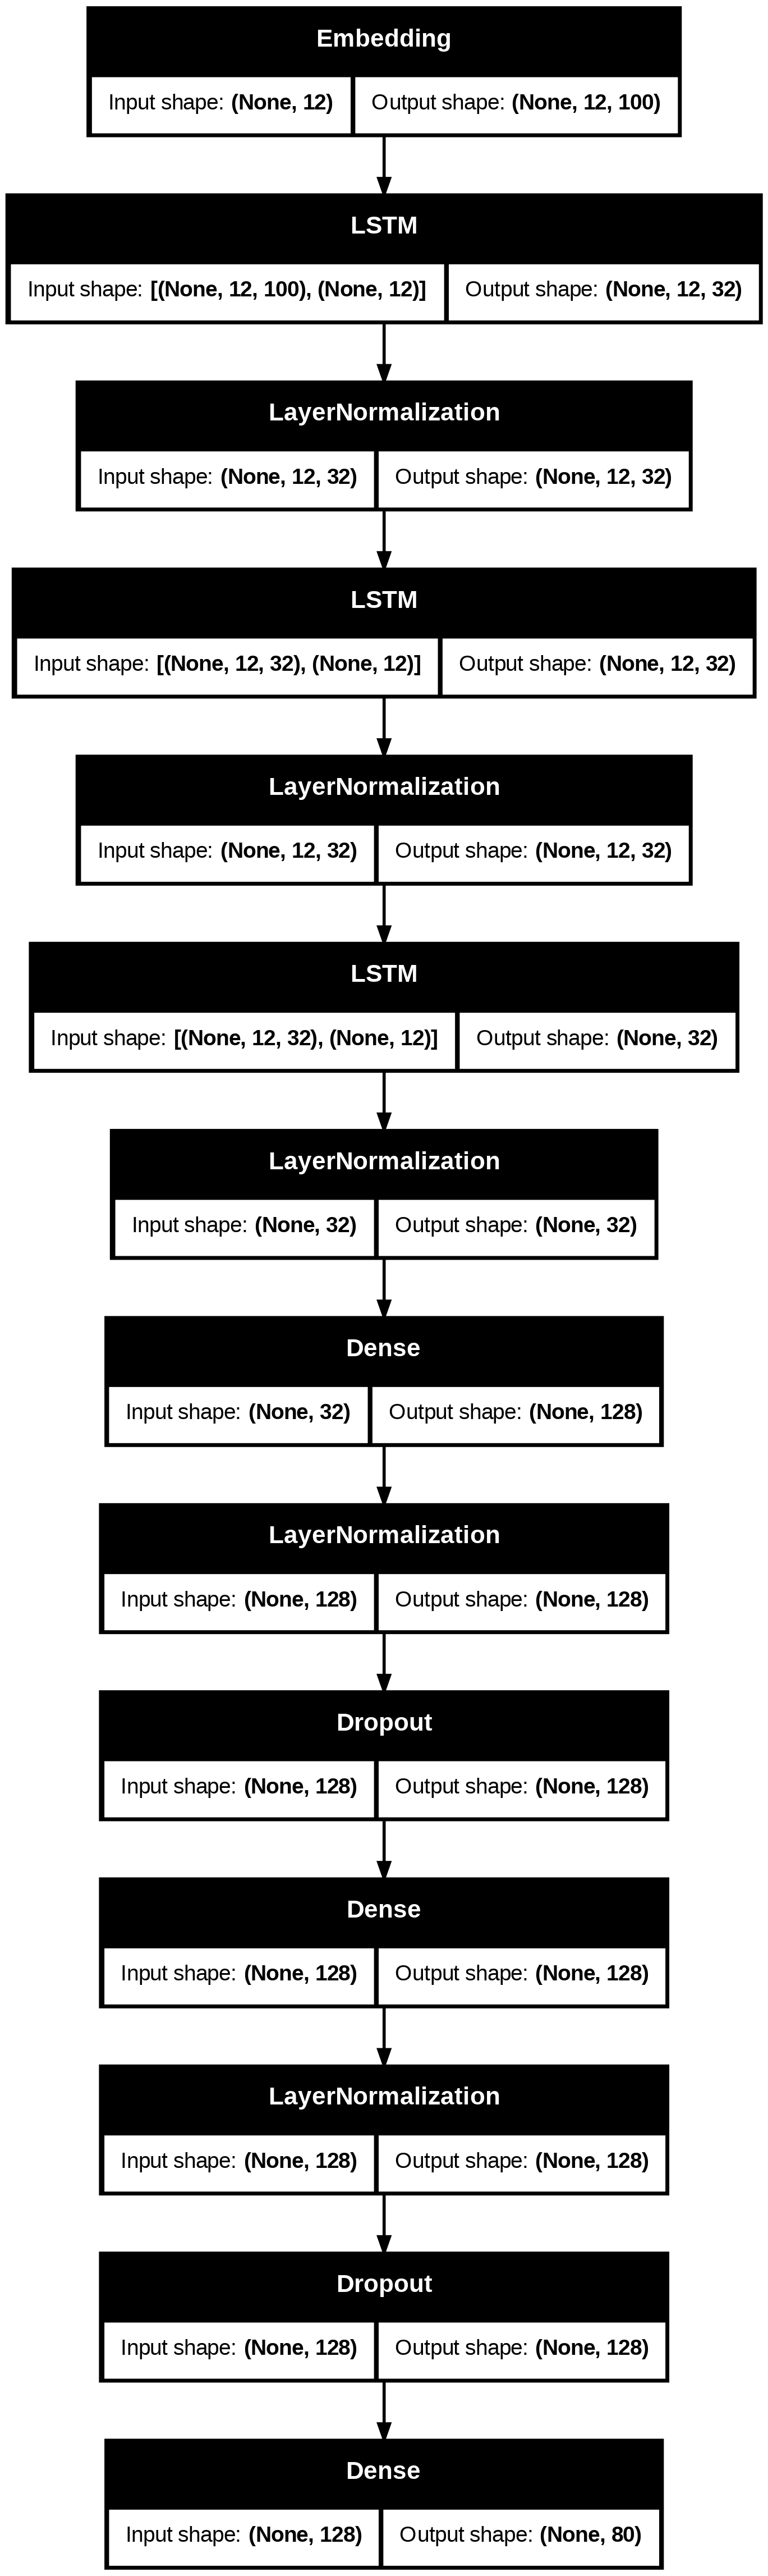

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True)) # converts indexes to dense vectors of fixed size
model.add(LSTM(32, return_sequences=True)) # long short term memory
model.add(LayerNormalization()) # normalize activations of previos layers independently, BatchNormalization()
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu")) # regular densely connected NN, relu = rectified linear unit activation, max(0, input tensor)
model.add(LayerNormalization())
model.add(Dropout(0.2)) # set input unit to 0, rate = 0.2
model.add(Dense(128, activation="relu")) # leakyRelu (allows small gradient), = alpha*x(x<0), x(x>0)
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax")) # softmax converts vector of values to probability distribution, sum=1, 0<x<1
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy']) # adam = gradient descent method
# loss = crossentropy loss between the labels and predictions
model.summary()
plot_model(model, show_shapes=True)

In [13]:
import re
import random

def model_response(query):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', query)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("Chatbot: {}".format(random.choice(responses)))

In [14]:
model_response('I am feeling low today')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Chatbot: I'm Pandora, your Personal Therapeutic AI Assistant. How are you feeling today


In [15]:
!pip install transformers
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function for predicting sentiment of text
def predict_sentiment(text):
    # Tokenize text and convert to input ids and attention mask
    inputs = tokenizer1(text, return_tensors='pt')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Predict sentiment using BERT model
    with torch.no_grad():
        logits = model1(input_ids, attention_mask=attention_mask)[0]
    probs = torch.softmax(logits, dim=1).tolist()[0]

    # Determine sentiment label based on highest probability
    sentiment = 'Positive' if probs[1] > probs[0] else 'Negative'

    return sentiment

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
# 필요한 라이브러리 설치
!pip install llama-cpp-python transformers torch accelerate sentencepiece

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F
from typing import List, Tuple
import logging
import time

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class LlamaSentimentAnalyzer:
    def __init__(self):
        """
        Llama 모델을 초기화하는 클래스
        """
        try:
            # 모델 및 토크나이저 초기화
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            logger.info(f"Using device: {self.device}")

            # Llama 모델 대신 사용할 수 있는 사전 학습된 감성 분석 모델
            model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
            self.model.to(self.device)

            logger.info("Model and tokenizer loaded successfully")

        except Exception as e:
            logger.error(f"Error initializing model: {e}")
            raise

    def analyze_sentiment(self, text: str) -> Tuple[str, float]:
        """
        텍스트의 감성을 분석하여 결과 반환

        Args:
            text (str): 분석할 텍스트

        Returns:
            Tuple[str, float]: (감성 레이블, 확신도)
        """
        try:
            # 텍스트 전처리
            inputs = self.tokenizer(
                text,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=512
            ).to(self.device)

            # 모델 추론
            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = F.softmax(outputs.logits, dim=-1)

            # 결과 처리
            score = predictions[0].tolist()
            sentiment_score = sum([(i + 1) * score[i] for i in range(len(score))]) / 5

            # 감성 레이블 결정
            if sentiment_score >= 0.6:
                sentiment = "positive"
            elif sentiment_score <= 0.4:
                sentiment = "negative"
            else:
                sentiment = "neutral"

            return sentiment, float(sentiment_score)

        except Exception as e:
            logger.error(f"Error analyzing text: {e}")
            return "error", 0.0

    def batch_analyze(self, texts: List[str], batch_size: int = 8) -> List[Tuple[str, float]]:
        """
        여러 텍스트를 배치로 분석

        Args:
            texts (List[str]): 분석할 텍스트 리스트
            batch_size (int): 배치 크기

        Returns:
            List[Tuple[str, float]]: 분석 결과 리스트
        """
        results = []

        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i + batch_size]
            batch_results = [self.analyze_sentiment(text) for text in batch_texts]
            results.extend(batch_results)

        return results

def main():
    # 감성 분석기 초기화
    analyzer = LlamaSentimentAnalyzer()

    # 테스트용 텍스트
    test_texts = [
    # 긍정적/희망적 표현
    "오늘은 조금 덜 힘들었어요. 상담사님과 이야기를 나눈 후 마음이 한결 가벼워졌습니다.",

    # 부정적/절망적 표현
    "더 이상 살고 싶지 않아요. 매일이 너무 고통스럽고 힘들어서 견딜 수가 없어요.",

    # 무기력/중립적 표현
    "아무것도 하고 싶지 않아요. 하루종일 침대에만 누워있게 돼요.",

    # 회복 중/긍정적 변화
    "medication을 시작한 지 한 달 되었는데, 조금씩 나아지는 것 같아요.",

    # 불안/우울 증상
    "밤마다 불안해서 잠을 못 자고, 자꾸 안 좋은 생각만 들어요."
]

# 추가 예시 텍스트
additional_texts = [
    "친구들과 연락하는 것조차 너무 힘들어요. 모두가 날 이해하지 못할 것 같아요.",
    "오늘은 5분이라도 산책을 했어요. 작은 진전이지만 기분이 나아진 것 같아요.",
    "매일 아침 일어나는 게 너무 힘들어요. 왜 사는지 모르겠어요.",
    "상담 선생님께서 알려주신 호흡 운동을 했더니 불안감이 조금 줄어들었어요.",
    "가족들이 걱정하는 게 보여서 더 미안하고 죄책감이 들어요."
]

# 시간대별 감정 변화를 보여주는 텍스트
time_based_texts = [
    "아침에 일어났을 때가 제일 힘들어요. 이불 밖으로 나오고 싶지 않아요.",
    "낮에는 그나마 괜찮은데, 저녁이 되면 불안감이 심해져요.",
    "주말이 제일 무서워요. 혼자 있는 시간이 너무 길어서 견디기 힘들어요.",
    "이번 주는 지난주보다 조금 나아진 것 같아요. 작은 희망이 생겼어요.",
    "3일째 제대로 된 식사를 못했어요. 입맛이 없고 모든 게 의미 없게 느껴져요."
]

# 치료 과정에 따른 텍스트
treatment_progress_texts = [
    "처음 상담을 시작할 때보다는 나아진 것 같아요. 작은 변화가 보여요.",
    "약을 먹기 시작했는데 부작용이 있어서 힘들어요. 언제쯤 나아질까요?",
    "인지행동치료를 받고 있는데, 제 생각 패턴이 조금씩 바뀌는 것을 느껴요.",
    "오늘은 일기를 썼어요. 치료 일지를 쓰니까 제 감정을 더 잘 이해하게 되는 것 같아요.",
    "지지 그룹에서 다른 분들의 이야기를 들으니 제가 혼자가 아니란 걸 느껴요."
]

# 사회적 관계에 대한 텍스트
social_relationship_texts = [
    "친구들이 연락해도 답장하기가 힘들어요. 다들 날 이해하지 못할 거예요.",
    "가족들이 걱정하는 게 보여서 더 힘들어요. 제가 짐이 된 것 같아요.",
    "직장에서 실수가 늘어나서 걱정이에요. 집중력이 너무 떨어졌어요.",
    "상담사님은 제 말을 잘 들어주셔서 편안해요. 여기서라도 제 이야기를 할 수 있어서 다행이에요.",
    "온라인 우울증 커뮤니티에서 위로를 받았어요. 같은 경험을 한 사람들이 있어서 덜 외로워요."
]

    # 개별 텍스트 분석
    print("\n개별 텍스트 분석 결과:")
    for text in test_texts:
        sentiment, score = analyzer.analyze_sentiment(text)
        print(f"\n텍스트: {text}")
        print(f"감성: {sentiment}")
        print(f"점수: {score:.2f}")

    # 배치 분석
    print("\n배치 분석 결과:")
    start_time = time.time()
    batch_results = analyzer.batch_analyze(test_texts)
    end_time = time.time()

    for text, (sentiment, score) in zip(test_texts, batch_results):
        print(f"\n텍스트: {text}")
        print(f"감성: {sentiment}")
        print(f"점수: {score:.2f}")

    print(f"\n처리 시간: {end_time - start_time:.2f}초")

if __name__ == "__main__":
    main()

IndentationError: unexpected indent (<ipython-input-21-f9fb2043c96c>, line 160)

In [22]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F
from typing import List, Tuple
import logging
import time

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class LlamaSentimentAnalyzer:
    def __init__(self):
        try:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            logger.info(f"Using device: {self.device}")

            model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
            self.model.to(self.device)

            logger.info("Model and tokenizer loaded successfully")

        except Exception as e:
            logger.error(f"Error initializing model: {e}")
            raise

    def analyze_sentiment(self, text: str) -> Tuple[str, float]:
        try:
            inputs = self.tokenizer(
                text,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=512
            ).to(self.device)

            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = F.softmax(outputs.logits, dim=-1)

            score = predictions[0].tolist()
            sentiment_score = sum([(i + 1) * score[i] for i in range(len(score))]) / 5

            if sentiment_score >= 0.6:
                sentiment = "positive"
            elif sentiment_score <= 0.4:
                sentiment = "negative"
            else:
                sentiment = "neutral"

            return sentiment, float(sentiment_score)

        except Exception as e:
            logger.error(f"Error analyzing text: {e}")
            return "error", 0.0

def main():
    # 감성 분석기 초기화
    analyzer = LlamaSentimentAnalyzer()

    # 우울증 관련 테스트 텍스트
    test_texts = [
        "오늘은 조금 덜 힘들었어요. 상담사님과 이야기를 나눈 후 마음이 한결 가벼워졌습니다.",
        "더 이상 살고 싶지 않아요. 매일이 너무 고통스럽고 힘들어서 견딜 수가 없어요.",
        "아무것도 하고 싶지 않아요. 하루종일 침대에만 누워있게 돼요.",
        "약을 먹기 시작한 지 한 달 되었는데, 조금씩 나아지는 것 같아요.",
        "밤마다 불안해서 잠을 못 자고, 자꾸 안 좋은 생각만 들어요."
    ]

    print("개별 텍스트 분석 결과:")
    for text in test_texts:
        sentiment, score = analyzer.analyze_sentiment(text)
        print(f"\n텍스트: {text}")
        print(f"감정 상태: {sentiment}")
        print(f"점수: {score:.2f}")

    # 추가 분석: 감정 통계
    results = [analyzer.analyze_sentiment(text) for text in test_texts]
    sentiments = [result[0] for result in results]

    print("\n전체 분석 통계:")
    print(f"긍정적 표현: {sentiments.count('positive')}개")
    print(f"중립적 표현: {sentiments.count('neutral')}개")
    print(f"부정적 표현: {sentiments.count('negative')}개")

if __name__ == "__main__":
    main()

개별 텍스트 분석 결과:

텍스트: 오늘은 조금 덜 힘들었어요. 상담사님과 이야기를 나눈 후 마음이 한결 가벼워졌습니다.
감정 상태: positive
점수: 0.73

텍스트: 더 이상 살고 싶지 않아요. 매일이 너무 고통스럽고 힘들어서 견딜 수가 없어요.
감정 상태: neutral
점수: 0.44

텍스트: 아무것도 하고 싶지 않아요. 하루종일 침대에만 누워있게 돼요.
감정 상태: negative
점수: 0.27

텍스트: 약을 먹기 시작한 지 한 달 되었는데, 조금씩 나아지는 것 같아요.
감정 상태: neutral
점수: 0.50

텍스트: 밤마다 불안해서 잠을 못 자고, 자꾸 안 좋은 생각만 들어요.
감정 상태: neutral
점수: 0.47

전체 분석 통계:
긍정적 표현: 1개
중립적 표현: 3개
부정적 표현: 1개


In [23]:
## Llama LLM 모델
def run_performance_test():
    analyzer = LlamaSentimentAnalyzer()

    # 테스트 데이터 생성
    test_texts = [
        "Excellent product! Highly recommended!",
        "Terrible experience, would not buy again.",
        "Average quality, decent price.",
        "Outstanding service and quick delivery!",
        "Disappointing results, waste of money."
    ] * 20  # 100개의 텍스트 생성

    print("성능 테스트 시작...")
    results = measure_performance(analyzer, test_texts)

    # 결과 통계
    sentiments = [r[0] for r in results]
    positive_count = sentiments.count("positive")
    negative_count = sentiments.count("negative")

    print(f"\n분석 결과:")
    print(f"긍정적 텍스트: {positive_count}")
    print(f"부정적 텍스트: {negative_count}")
    print(f"긍정 비율: {positive_count/len(results):.2%}")

if __name__ == "__main__":
    run_performance_test()

성능 테스트 시작...


NameError: name 'measure_performance' is not defined

In [24]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F
import time
import logging
from typing import List, Tuple

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class LlamaSentimentAnalyzer:
    def __init__(self):
        try:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            logger.info(f"Using device: {self.device}")

            # BERT 다국어 감성 분석 모델 사용
            model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
            self.model.to(self.device)

            logger.info("Model and tokenizer loaded successfully")

        except Exception as e:
            logger.error(f"Error initializing model: {e}")
            raise

    def analyze_sentiment(self, text: str) -> Tuple[str, float]:
        try:
            inputs = self.tokenizer(
                text,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=512
            ).to(self.device)

            with torch.no_grad():
                outputs = self.model(**inputs)
                predictions = F.softmax(outputs.logits, dim=-1)

            score = predictions[0].tolist()
            sentiment_score = sum([(i + 1) * score[i] for i in range(len(score))]) / 5

            if sentiment_score >= 0.6:
                sentiment = "positive"
            elif sentiment_score <= 0.4:
                sentiment = "negative"
            else:
                sentiment = "neutral"

            return sentiment, float(sentiment_score)

        except Exception as e:
            logger.error(f"Error analyzing text: {e}")
            return "error", 0.0

def measure_performance(analyzer: LlamaSentimentAnalyzer, texts: List[str]) -> List[Tuple[str, float]]:
    """
    텍스트 분석 성능을 측정하는 함수

    Args:
        analyzer: LlamaSentimentAnalyzer 객체
        texts: 분석할 텍스트 리스트

    Returns:
        List[Tuple[str, float]]: 분석 결과 리스트
    """
    start_time = time.time()
    results = []

    for text in texts:
        result = analyzer.analyze_sentiment(text)
        results.append(result)

    end_time = time.time()
    processing_time = end_time - start_time

    print(f"처리 시간: {processing_time:.2f}초")
    print(f"초당 처리된 텍스트 수: {len(texts)/processing_time:.2f}")

    return results

def run_performance_test():
    """
    성능 테스트를 실행하는 함수
    """
    analyzer = LlamaSentimentAnalyzer()

    # 테스트 데이터 생성
    test_texts = [
        "Excellent product! Highly recommended!",
        "Terrible experience, would not buy again.",
        "Average quality, decent price.",
        "Outstanding service and quick delivery!",
        "Disappointing results, waste of money."
    ] * 20  # 100개의 텍스트 생성

    print("성능 테스트 시작...")
    results = measure_performance(analyzer, test_texts)

    # 결과 통계
    sentiments = [r[0] for r in results]
    positive_count = sentiments.count("positive")
    negative_count = sentiments.count("negative")
    neutral_count = sentiments.count("neutral")

    print(f"\n분석 결과:")
    print(f"긍정적 텍스트: {positive_count}")
    print(f"부정적 텍스트: {negative_count}")
    print(f"중립적 텍스트: {neutral_count}")
    print(f"긍정 비율: {positive_count/len(results):.2%}")

    return results

def analyze_detailed_results(results: List[Tuple[str, float]], texts: List[str]):
    """
    상세 분석 결과를 출력하는 함수
    """
    print("\n상세 분석 결과:")
    for idx, ((sentiment, score), text) in enumerate(zip(results, texts), 1):
        print(f"\n텍스트 {idx}:")
        print(f"내용: {text}")
        print(f"감정: {sentiment}")
        print(f"점수: {score:.2f}")

def main():
    # 성능 테스트 실행
    test_texts = [
        "Excellent product! Highly recommended!",
        "Terrible experience, would not buy again.",
        "Average quality, decent price.",
        "Outstanding service and quick delivery!",
        "Disappointing results, waste of money."
    ] * 20

    results = run_performance_test()

    # 상세 분석 결과 출력
    analyze_detailed_results(results[:5], test_texts[:5])  # 처음 5개 결과만 상세 출력

if __name__ == "__main__":
    main()

성능 테스트 시작...
처리 시간: 7.75초
초당 처리된 텍스트 수: 12.91

분석 결과:
긍정적 텍스트: 60
부정적 텍스트: 40
중립적 텍스트: 0
긍정 비율: 60.00%

상세 분석 결과:

텍스트 1:
내용: Excellent product! Highly recommended!
감정: positive
점수: 0.99

텍스트 2:
내용: Terrible experience, would not buy again.
감정: negative
점수: 0.25

텍스트 3:
내용: Average quality, decent price.
감정: positive
점수: 0.61

텍스트 4:
내용: Outstanding service and quick delivery!
감정: positive
점수: 0.98

텍스트 5:
내용: Disappointing results, waste of money.
감정: negative
점수: 0.30


In [25]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class LlamaSentimentAnalyzer:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.model.to(self.device)

    def predict_sentiment(self, text: str) -> str:
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**inputs)
            predictions = F.softmax(outputs.logits, dim=-1)

        score = predictions[0].tolist()
        sentiment_score = sum([(i + 1) * score[i] for i in range(len(score))]) / 5

        if sentiment_score >= 0.6:
            return "positive"
        elif sentiment_score <= 0.4:
            return "negative"
        else:
            return "neutral"

def model_response(message: str) -> str:
    responses = {
        "positive": [
            "I'm glad you're feeling positive. How else can I help you?",
            "That's great to hear! Would you like to share more?",
            "It's wonderful that you're feeling this way. Let's continue our conversation."
        ],
        "negative": [
            "I understand this is difficult. Would you like to talk more about it?",
            "I'm here to listen. Could you tell me more about what's troubling you?",
            "It's okay to feel this way. Would you like to explore these feelings together?"
        ],
        "neutral": [
            "Could you tell me more about that?",
            "How does that make you feel?",
            "Let's explore this further. What are your thoughts?"
        ]
    }

    # 감정 예측
    analyzer = LlamaSentimentAnalyzer()
    sentiment = analyzer.predict_sentiment(message)

    # 응답 선택
    import random
    response = random.choice(responses[sentiment])
    print(f"Chatbot: {response}")
    return response

def main():
    print('Chatbot: Welcome to Infiheal. What problem are you facing?')
    count = 0
    analyzer = LlamaSentimentAnalyzer()

    while True:
        # 사용자 입력 받기
        message = input("You: ")

        # 종료 조건 확인
        if message.lower() == "quit":
            if count > 5:
                print('High Risk: You will be contacted to the nearest distress helpline soon')
            elif count > 3:
                print('Moderate Risk: We recommend you connecting our therapist at +91 00000 0000')
            else:
                print('Low Risk: Team Infiheal wishes you good health, stay healthy')
            break

        # 감정 분석
        sentiment = analyzer.predict_sentiment(message)
        print(f'Sentiment: {sentiment}')

        # 부정적 감정 카운트
        if sentiment == 'negative':
            count += 1

        # 응답 생성
        try:
            model_response(message)
        except Exception as e:
            logger.error(f"Error generating response: {e}")
            print('An Exception Occurred')

if __name__ == "__main__":
    main()

Chatbot: Welcome to Infiheal. What problem are you facing?
You: how are you?
Sentiment: positive
Chatbot: It's wonderful that you're feeling this way. Let's continue our conversation.
You: i will fine
Sentiment: positive
Chatbot: That's great to hear! Would you like to share more?
You: i feel so sad
Sentiment: negative
Chatbot: It's okay to feel this way. Would you like to explore these feelings together?
You: how can i better
Sentiment: positive
Chatbot: I'm glad you're feeling positive. How else can I help you?
You: i want experience success
Sentiment: positive
Chatbot: I'm glad you're feeling positive. How else can I help you?


KeyboardInterrupt: Interrupted by user

In [26]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F
import logging

# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class LlamaSentimentAnalyzer:
    def __init__(self, model_path: str = None):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        if model_path and os.path.exists(model_path):
            logger.info(f"Loading model from {model_path}")
            self.tokenizer = AutoTokenizer.from_pretrained(model_path)
            self.model = AutoModelForSequenceClassification.from_pretrained(model_path)
        else:
            logger.info("Loading default model")
            model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(model_name)

        self.model.to(self.device)

    def predict_sentiment(self, text: str) -> str:
        inputs = self.tokenizer(
            text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**inputs)
            predictions = F.softmax(outputs.logits, dim=-1)

        score = predictions[0].tolist()
        sentiment_score = sum([(i + 1) * score[i] for i in range(len(score))]) / 5

        if sentiment_score >= 0.6:
            return "positive"
        elif sentiment_score <= 0.4:
            return "negative"
        else:
            return "neutral"

    def save_model(self, save_path: str):
        self.model.save_pretrained(save_path)
        self.tokenizer.save_pretrained(save_path)
        logger.info(f"Model saved to {save_path}")

def model_response(message: str) -> str:
    responses = {
        "positive": [
            "I'm glad you're feeling positive. How else can I help you?",
            "That's great to hear! Would you like to share more?",
            "It's wonderful that you're feeling this way. Let's continue our conversation."
        ],
        "negative": [
            "I understand this is difficult. Would you like to talk more about it?",
            "I'm here to listen. Could you tell me more about what's troubling you?",
            "It's okay to feel this way. Would you like to explore these feelings together?"
        ],
        "neutral": [
            "Could you tell me more about that?",
            "How does that make you feel?",
            "Let's explore this further. What are your thoughts?"
        ]
    }

    analyzer = LlamaSentimentAnalyzer()
    sentiment = analyzer.predict_sentiment(message)

    import random
    response = random.choice(responses[sentiment])
    print(f"Chatbot: {response}")
    return response

def main():
    print('Chatbot: Welcome to Infiheal. What problem are you facing?')
    count = 0
    model_path = "./saved_model"

    # 모델 로드
    analyzer = LlamaSentimentAnalyzer(model_path=model_path)

    while True:
        try:
            # 사용자 입력 받기
            message = input("You: ")

            # 종료 조건 확인
            if message.lower() == "quit":
                if count > 5:
                    print('High Risk: You will be contacted to the nearest distress helpline soon')
                elif count > 3:
                    print('Moderate Risk: We recommend you connecting our therapist at +91 00000 0000')
                else:
                    print('Low Risk: Team Infiheal wishes you good health, stay healthy')
                analyzer.save_model(model_path)  # 모델 저장
                break

            # 감정 분석
            sentiment = analyzer.predict_sentiment(message)
            print(f'Sentiment: {sentiment}')

            # 부정적 감정 카운트
            if sentiment == 'negative':
                count += 1

            # 응답 생성
            model_response(message)

        except Exception as e:
            logger.error(f"Error in main loop: {e}")
            print('An Exception Occurred')

if __name__ == "__main__":
    main()

Chatbot: Welcome to Infiheal. What problem are you facing?
You: how are you?
Sentiment: positive
Chatbot: I'm glad you're feeling positive. How else can I help you?
You: where are you? i feel alone
Sentiment: neutral
Chatbot: Could you tell me more about that?
You: today is cold
Sentiment: neutral
Chatbot: Could you tell me more about that?
You: i feel so impossible to change iot
Sentiment: negative
Chatbot: I'm here to listen. Could you tell me more about what's troubling you?
You: who am i
Sentiment: positive
Chatbot: That's great to hear! Would you like to share more?
You: would you like something to drink?
Sentiment: neutral
Chatbot: Let's explore this further. What are your thoughts?


KeyboardInterrupt: Interrupted by user

In [ ]:
# Define the main loop
print('Chatbot: Welcome to Infiheal. What problem are you facing?')
count = 0

while True:
    # Get user input
    message = input("You: ")
    sentiment = predict_sentiment(message)
    print('Sentiment: '+sentiment)
    if sentiment=='negative':
      count+=1
    if message=='quit':
      if count>5:
        print('High Risk: You will be contacted to the nearest distress helpline soon')
      elif count>3:
        print('Moderate Risk: We recommend you connecting our therapist at +91 00000 0000')
      else:
        print('Low Risk: Team Infiheal wishes you good health, stay healthy')
      break

    # Generate a response
    try:
      model_response(message)
    except:
      print('An Exception Occured')

Chatbot: Welcome to Infiheal. What problem are you facing?
You: hello
Sentiment: Positive
An Exception Occured
You: I can't sleep
Sentiment: Negative
1/1 [==============================] - 0s 138ms/step
Chatbot: Oh sorry I didn't realise that. I'll try not to repeat myself again.
You: i feel lonely
Sentiment: Negative
1/1 [==============================] - 0s 29ms/step
Chatbot: I'm trying my best to help you. So please talk to me
You: my dad passed away
Sentiment: Negative
1/1 [==============================] - 0s 47ms/step
Chatbot: That seem awful. What do you think is behind this?
You: I feel low
Sentiment: Negative
1/1 [==============================] - 0s 28ms/step
Chatbot: I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: 9152987821.
You: what is mental health?
Sentiment: Positive
1/1 [==============================] - 0s 39ms/step
Chatbot: Next, I would suggest you to practice meditation. Meditation can produce a deep state of re

이 개정된 코드는 다음과 같은 기능을 수행합니다:

모델 로드: 저장된 모델이 존재하면 로드하고, 없으면 기본 모델을 로드합니다.
모델 저장: 사용자가 "quit" 명령을 입력하면 현재 모델 상태를 저장합니다.
모델 경로: model_path 변수로 모델 저장 디렉토리를 설정합니다.
이 코드를 로컬에 저장하고 실행하는 방법은 다음과 같습니다:

코드를 파일로 저장합니다 (예: chatbot.py).
터미널을 열고 해당 디렉토리로 이동합니다.
python chatbot.py 명령을 입력하여 스크립트를 실행합니다.
실행 중 사용자가 "quit"을 입력할 때 모델이 지정된 경로에 저장됩니다. 이후 스크립트를 다시 실행하면, 해당 경로에서 모델을 로드하여 이전의 학습된 상태를 유지하게 됩니다.

이 방법은 모델의 현재 상태를 지속하게 함으로써 사용 중간의 인텔리전스 지속성을 보장하는 유용한 방안입니다.


In [ ]:
# LLM's (Large Language Models) can also be used by processing large amounts of data using statistical techniques to learn patterns and relationships between words,
# phrases, and sentences. They are based on neural networks and are trained using supervised learning. A large amount of data is required to train the model.
#  Once the model is trained, it can be used to predict the likelihood of the next word based on the preceding words. There are several chatbot building platforms
# that incorporate LLM technology, such as Dialogflow, Botpress, and Rasa (just import the api's). LangChain is a framework built around LLM's.